<a href="https://colab.research.google.com/github/mwmikewise/IMDB_Sentiment_Analysis/blob/main/IMDB_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Movie Sentiment Analysis**

## Problem Statement

A movie studio has had a few box office flops, and wishes to see exactly what people did not like when watching their films. They are hoping to look at bad reviews and see what problems they can fix in order to produce a blockbuster hit. The studio has provided raw data of reviews from IMDB, as well as whether people felt the movie was good or not. As a data scientist, it is our job to clean up the reviews and perform sentiment analysis to categorize reviews as positive or negative. The studio can then look at the negative reviews and see what to avoid for future productions. They also wish to be able to use the sentiment analysis on reviews from other sites if they so choose.

Importing Libraries and Training Set

In [9]:
import nltk
nltk.download('popular')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [10]:
train_df = pd.read_csv("Train.csv")

Exploratory Data Analysis

In [3]:
train_df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


Notes:
*   2 columns
*   label column: 0=neg. review, 1=pos. review
*   The text column is the written review

In [11]:
#Rename the columns so the headers make sense visually
train_df = train_df.rename(columns = {'text':'Reviews', 'label':'Rating'})

In [ ]:
train_df.info()
train_df[['Reviews', 'Rating']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  40000 non-null  object
 1   Rating   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


,Rating
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Notes: (Renamed columns for better description)
*   40,000 rows total
*   Neither column has any missing values
*   Review column is classified as object
*   Rating column are integers
*   Mean is about 0.5. Since our lables are only 0 or 1 then there is about an even number of both positive and negative labels (slightly more negative since it is less than 0.5)

In [ ]:
train_df['Rating'].value_counts()

0    20019
1    19981
Name: Rating, dtype: int64

Notes:
*   Counts confirm that there are slightly more negative reviews, but about the same for both

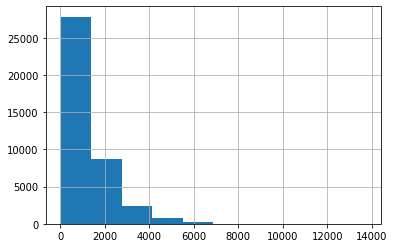

In [ ]:
train_df['Reviews'].str.len().hist()

Notes:
*   Range of table goes to 14000 for number of characters meaning at least one value goes that high, but can't see on histogram so very few
*   Most reviews seem to fall in range of 0-2000 characters, but there are a noteable amount that go up to 4000 characters

Creating function for word count and word length as histograms

In [ ]:
def num_of_words_hist(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

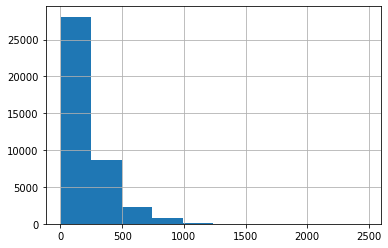

In [ ]:
num_of_words_hist(train_df['Reviews'])

Notes:
*   Most reviews range from 0-500 words with most falling between about 0-200
*   Histgram goes up to 2500, so at least one sentence with that many words, but can't see bar on graph so very few
*   Hardly any reviews over 1250 words

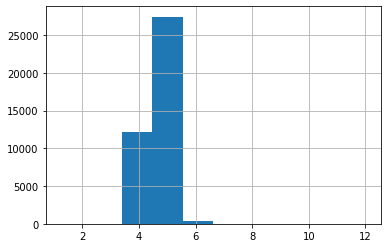

In [ ]:
train_df['Reviews'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

Notes:
*   Average word length is around 3-6 but this includes stopwords


Looking at the count of the top stopwords

In [12]:
from nltk.corpus import stopwords

In [5]:
corpus=[]

def top_stopwords_bar_graph(text):
    stop=set(stopwords.words('english'))
    
    train_df_reviews= text.str.split()
    train_df_reviews=train_df_reviews.values.tolist()
    corpus=[word for i in train_df_reviews for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15] 
    x,y=zip(*top)
    plt.bar(x,y)

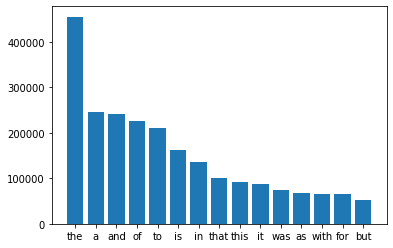

In [ ]:
top_stopwords_bar_graph(train_df['Reviews'])

Notes:
*   List of 15 most common stop words used in reviews
*   The word "the" is used more times than there are reviews, so in some reviews it is used more than once

Function to find 15 most common n-grams

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

Top 15 bi-grams

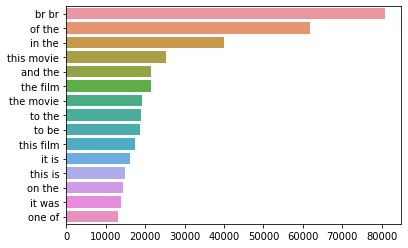

In [ ]:
top_n_bigrams=get_top_ngram(train_df['Reviews'],2)[:15]
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x) 

Notes:
*   br br is most common bi-gram
*   Looking at CSV file of dataset seems br is used as line breaks. These are being counted as words. Will probably need to remove before doing analysis



Top 15 tri-grams

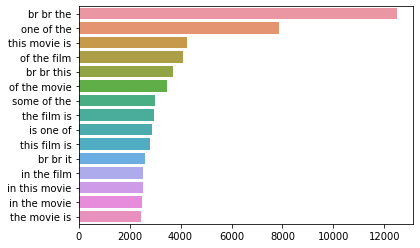

In [ ]:
top_n_trigrams=get_top_ngram(train_df['Reviews'],3)[:15]
x,y=map(list,zip(*top_n_trigrams)) 
sns.barplot(x=y,y=x) 

Notes:
*   Trigrams didn't offer anymore insight than bigrams


Visualizing negative vs positive reviews

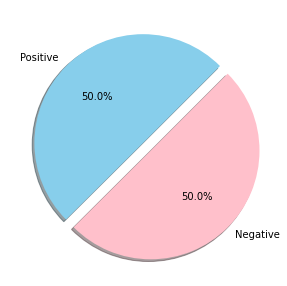

In [ ]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=train_df[train_df['Rating']==1]
neg=train_df[train_df['Rating']==0]
ck=[pos['Rating'].count(),neg['Rating'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

Preprocessing Data

In [13]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
train_df['Reviews']= train_df['Reviews'].apply(preprocessor)

Stemming reviews

In [14]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

Adding to list of stopwords and creating wordclouds

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


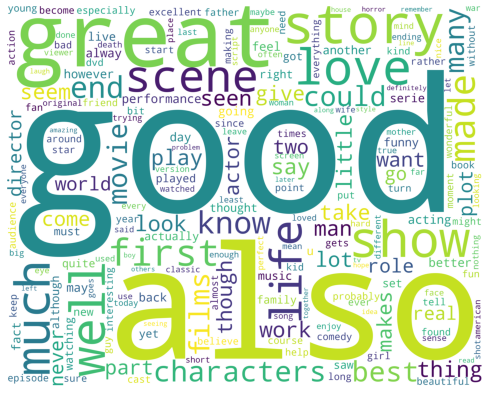

Negative words are as follows


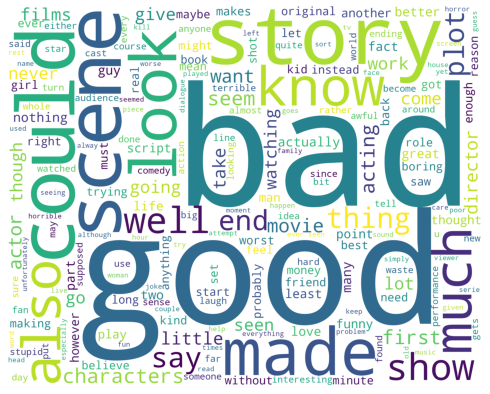

In [15]:
nltk.download('stopwords')
stop=stopwords.words('english')
new_stopwords = ['one','see','time','find','way','still','think','character','get','people','even','would',
                 'like','make','watch','something','really']
stop.extend(new_stopwords)

from wordcloud import WordCloud
positivedata = train_df[train_df['Rating'] == 1]
positivedata =positivedata['Reviews']
negdata = train_df[train_df['Rating'] == 0]
negdata= negdata['Reviews']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

Transforming dataset

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=train_df.Rating.values
x=tfidf.fit_transform(train_df.Reviews)

Importing and transforming test set

In [17]:
test_df = pd.read_csv('Test.csv')
test_df = test_df.rename(columns = {'text':'Reviews', 'label':'Rating'})
y_test=test_df.Rating.values
x_test=tfidf.transform(test_df.Reviews)

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(x,y)
y_pred = lr.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(acc))
print('Recall: {:.2f}%'.format(recall*100))

[[2107  388]
 [ 240 2265]]
Accuracy: 87.44%
Recall: 90.42%


Accuracy = 87.86%

Applying Grid Search to Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','sag','saga'],
    'max_iter' : [10000]}]
grid_search = GridSearchCV(estimator=lr, param_grid=parameters, scoring='accuracy', cv=3, verbose=True, n_jobs=-1)

In [ ]:
grid_search.fit(x,y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy: %', (best_accuracy*100))
print('Best Parameters:', best_parameters )

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best Accuracy: % 89.4449978618597
Best Parameters: {'C': 4.281332398719396, 'max_iter': 10000, 'solver': 'lbfgs'}


First grid search C=[1.5, 2.0, 2.5], solver=[sag, lbfgs], max_iter=[10000, 100000, 100000]

After first grid search C=2.5, max_iter=10000 and solver=lbfgs

Second grid search C=[2.5, 3.0, 3.5]
C=3.5

Third grid search C= 4.28, max_iter = 10000, solver = lbfgs acc=89.44%

Applying Optimal Hyperparameters with K-Fold Cross-Validation

In [14]:
lr = LogisticRegression(C = 4.3, max_iter=10000, solver = 'lbfgs')
lr.fit(x,y)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = x, y = y, cv = 10)
print('Accuracy: {:.2f}'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}'.format(accuracies.std()*100))

Accuracy: 90.02
Standard Deviation: 0.38


Accuracy = 90.02%

Std Dev = 0.38

Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)
y_pred2 = rf.predict(x_test)

In [17]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)
acc = accuracy_score(y_test, y_pred2)*100
print('Accuracy: %', acc)

[[1991  504]
 [ 345 2160]]
Accuracy: % 83.02000000000001


Accuracy = 83.02%

Applying for Grid Search to Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True, False],
               'max_depth': [int(x) for x in np.linspace(30, 50, num = 4)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [int(x) for x in np.linspace(start = 875, stop = 900, num = 10)]}
grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose = True,
                           n_jobs = -1)

In [ ]:
grid_search.fit(x,y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy:', (best_accuracy*100))
print('Best Parameters:',best_parameters)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


First: n_esimators=[25, 50, 75, 100]
After first grid search n_estimators =100


Applying Optimal Hyperparameters and Applying K-Fold Cross Validation

In [20]:
rf = RandomForestClassifier(n_estimators=930, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 83, bootstrap = False)
rf.fit(x,y)
y_pred2 = rf.predict(x_test)
accuracies = cross_val_score(estimator = rf, X = x, y = y, cv = 5)
print('Accuracy: {:.2f}'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}'.format(accuracies.std()*100))

Accuracy: 83.71
Standard Deviation: 0.46


Accuracy: 83.71%
Std dev: 0.46

XG Boost Classifier

In [47]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(gamma = 0.5, learning_rate = 0.5, max_depth = 1, n_estimators = 1000, reg_alpha = 1, reg_lambda = 0.5)
xgbc.fit(x,y)
y_pred3 = xgbc.predict(x_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
acc = accuracy_score(y_test, y_pred2)*100
print('Accuracy: %', acc)

[[2032  463]
 [ 272 2233]]
Accuracy: % 81.04


In [49]:
accuracies = cross_val_score(estimator = xgbc, X = x, y = y, cv = 5)
print('Accuracy: {:.2f}'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}'.format(accuracies.std()*100))

Accuracy: 88.00
Standard Deviation: 0.33


Accuracy = 88.00%

Std Dev = 0.33

Catboost Classifier

In [21]:
!pip3 install catboost
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(x,y)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 14 kB/s 
Learning rate set to 0.049775
0:	learn: 0.6776712	total: 2.62s	remaining: 43m 34s
1:	learn: 0.6635994	total: 4.64s	remaining: 38m 36s
2:	learn: 0.6508347	total: 6.65s	remaining: 36m 49s
3:	learn: 0.6396171	total: 8.88s	remaining: 36m 52s
4:	learn: 0.6298478	total: 14s	remaining: 46m 29s
5:	learn: 0.6204643	total: 17.2s	remaining: 47m 36s
6:	learn: 0.6135660	total: 19.3s	remaining: 45m 36s
7:	learn: 0.6071065	total: 21.4s	remaining: 44m 11s
8:	learn: 0.6012269	total: 23.4s	remaining: 42m 59s
9:	learn: 0.5957765	total: 25.5s	remaining: 42m 5s
10:	learn: 0.5895836	total: 27.5s	remaining: 41m 11s
11:	learn: 0.5842233	total: 29.5s	remaining: 40m 31s
12:	learn: 0.5790722	total: 31.5s	remaining: 39m 54s
13:	learn: 0.5749736	total: 33.5s	remaining: 39m 22s
14:	learn: 0.5707937	total: 35.6s	remaining: 38m 58s
15:	learn: 0.5663997	total: 37.7

In [24]:
y_pred4 = cbc.predict(x_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
acc4 = accuracy_score(y_test, y_pred4)*100
recall4 = recall_score(y_test, y_pred4)
print('Accuracy: {:.2f}%'.format(acc4))
print('Recall: {:.2f}%'.format(recall4*100))

[[1984  511]
 [ 246 2259]]
Accuracy: 84.86%
Recall: 90.18%


In [50]:
accuracies = cross_val_score(estimator = cbc, X = x, y = y, cv = 3)
print('Accuracy: {:.2f}'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}'.format(accuracies.std()*100))

Learning rate set to 0.041862
0:	learn: 0.6804717	total: 2.62s	remaining: 43m 40s
1:	learn: 0.6681860	total: 4.09s	remaining: 33m 59s
2:	learn: 0.6579346	total: 5.55s	remaining: 30m 44s
3:	learn: 0.6485592	total: 7.02s	remaining: 29m 8s
4:	learn: 0.6395621	total: 8.51s	remaining: 28m 13s
5:	learn: 0.6319383	total: 9.96s	remaining: 27m 29s
6:	learn: 0.6241668	total: 11.4s	remaining: 26m 58s
7:	learn: 0.6173641	total: 12.9s	remaining: 26m 36s
8:	learn: 0.6119520	total: 14.3s	remaining: 26m 19s
9:	learn: 0.6062771	total: 15.8s	remaining: 26m 7s
10:	learn: 0.6007148	total: 17.3s	remaining: 25m 56s
11:	learn: 0.5964802	total: 18.8s	remaining: 25m 46s
12:	learn: 0.5921172	total: 20.2s	remaining: 25m 35s
13:	learn: 0.5874393	total: 21.7s	remaining: 25m 28s
14:	learn: 0.5829811	total: 23.2s	remaining: 25m 21s
15:	learn: 0.5786886	total: 24.6s	remaining: 25m 15s
16:	learn: 0.5746711	total: 26.1s	remaining: 25m 10s
17:	learn: 0.5709496	total: 27.6s	remaining: 25m 5s
18:	learn: 0.5673850	total: 2

Accuracy: 87.47

Std Dev: 0.34

Initial Assessment:

Logistic regression performed the best in terms of accuracy. XG Boost and CatBoost were both close seconds. While CatBoost did have slightly less accuracy, it required no hyperparameter tuning unlike XG Boost.

Final Assessment:

Looking at recall, both linear regression and CatBoost scored slightly above 90%, with linear regression being slightly higher. Will reccomend the linear regression model